# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


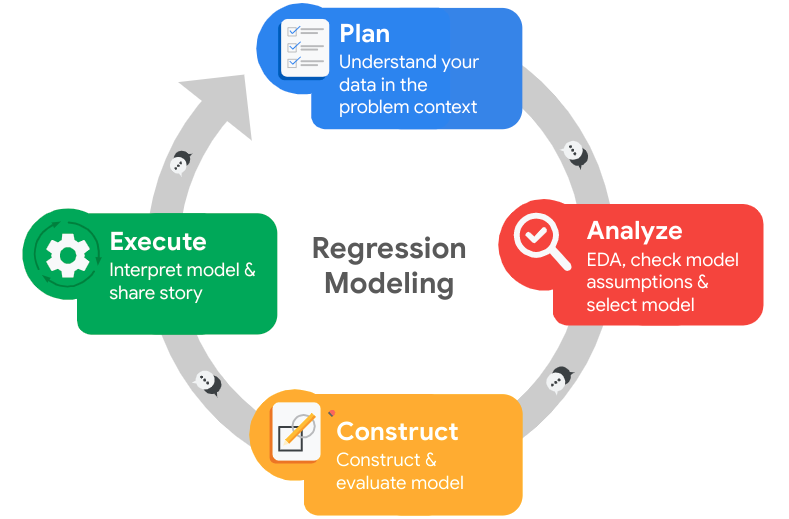

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
#Packages for data manipulation
import numpy as np
import pandas as pd

#Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Packages for evaluation metrics and other functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

#For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                            'time_spend_company' : 'tenure',
                            'Work_accident' : 'work_accident',
                            'Department' : 'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep= 'first' )

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

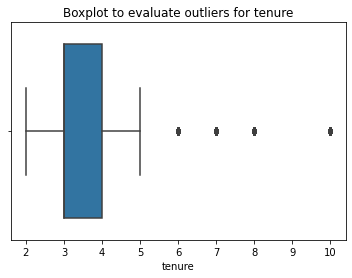

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['tenure']);
plt.title('Boxplot to evaluate outliers for tenure', fontsize=12);

In [12]:
# Determine the number of rows containing outliers

#Calculate the 25th percentile
percentile_25 = df1['tenure'].quantile(0.25)

#Calculate the 75th percentile
percentile_75 = df1['tenure'].quantile(0.75)

#Calculate the interquartile range in `tenure`
iqr = percentile_75 - percentile_25

#Calculate the upper and lower limits
upper = percentile_75 + 1.5*iqr
lower = percentile_25 - 1.5*iqr
print('Lower limit:', lower)
print('Upper limit:', upper)

#Determine the outliers
outliers = df1[(df1['tenure'] > upper) | (df1['tenure'] < lower)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

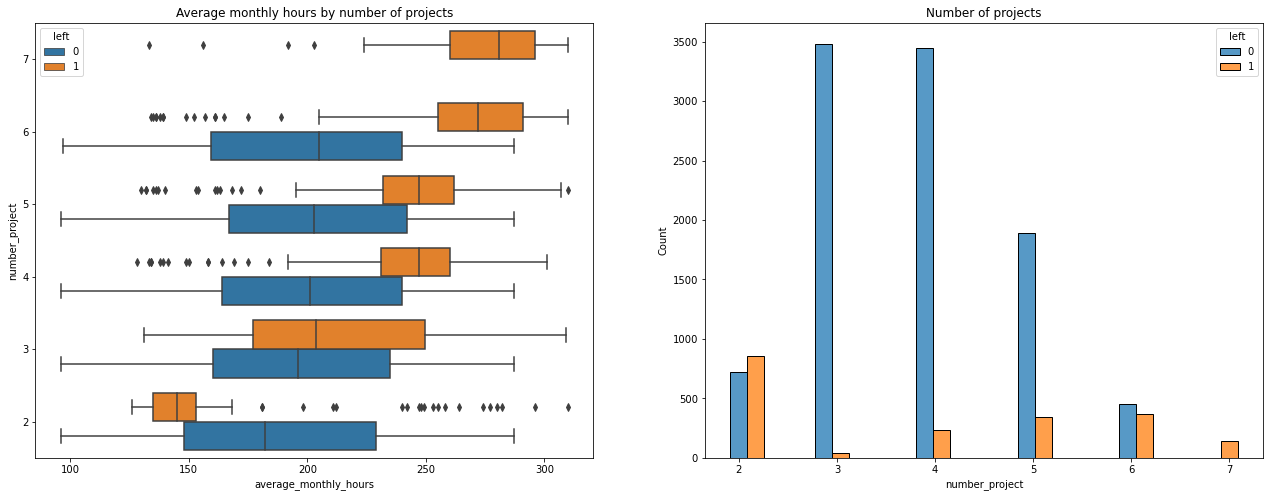

In [14]:
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create a stacked boxplot to show average monthly hours distributions for the number of projects, 
# comparing the distributions of employees who stayed versus those who left
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient='h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Average monthly hours by number of projects')

# Create a histogram to compare the number of projects between employees who stayed vs those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects')
plt.show()

Insights from the previous plots : 

1. We can observe that employee who work on more projects would also naturally work more hours. The mean working hours of each group increases with the number of projects worked.

2. Everyone who worked on seven projects left the company. The interquartile ranges of this group and those who worked on six projects and left was ~260&ndash;290 hours/month which is much more than other groups.

3. The optimal number of projects for the employees to work on seems to be between 3-5. The ratio of left/stayed is quite small as seen on the histogram.


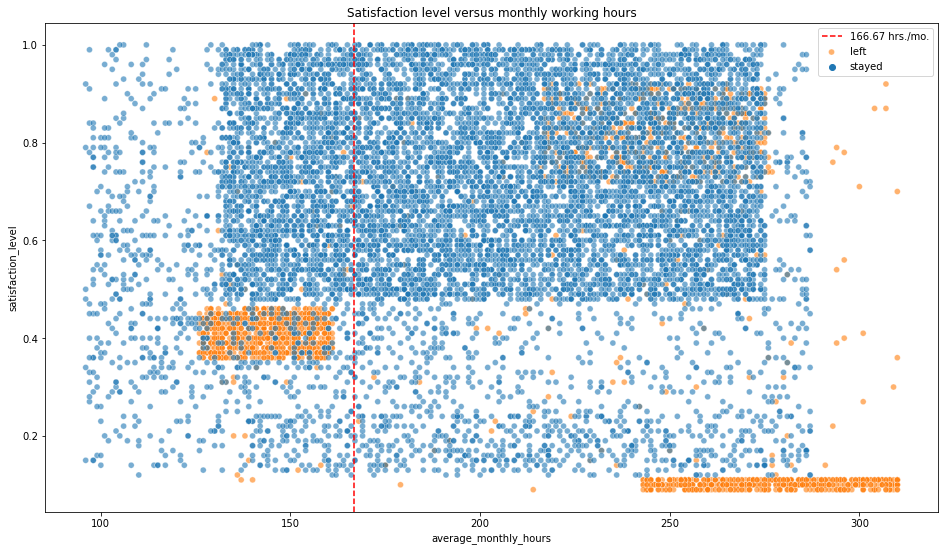

In [15]:
# Create a scatterplot of average monthly hours worked versus satisfaction level,
# comparing employees who stayed versus those who left

plt.figure(figsize = (16,9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.6)
plt.axvline(x = 166.67, color = 'r', ls = '--')
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Satisfaction level versus monthly working hours');

Insights from the above scatterplot:

1. A group of employees worked 240&ndash;320 hours per month. These long hours of work could be the reason of their satisfaction level being close to zero and left the company.

2. Another group of employees who worked close to normal hours and their satisfaction level was around 0.4 also left the company. It is difficult to speculate about why they might have left. It is possible they did not find fulfillment in their daily work and felt pressure from colleagues who worked long hours. These could have lowered their satisfaction level.

3. Employees who worked more than 280 hours all left the company.

4. A group who worked 210&ndash;280 per month,with satisfaction levels ranging from 0.7&ndash;0.9, eventually left the company.

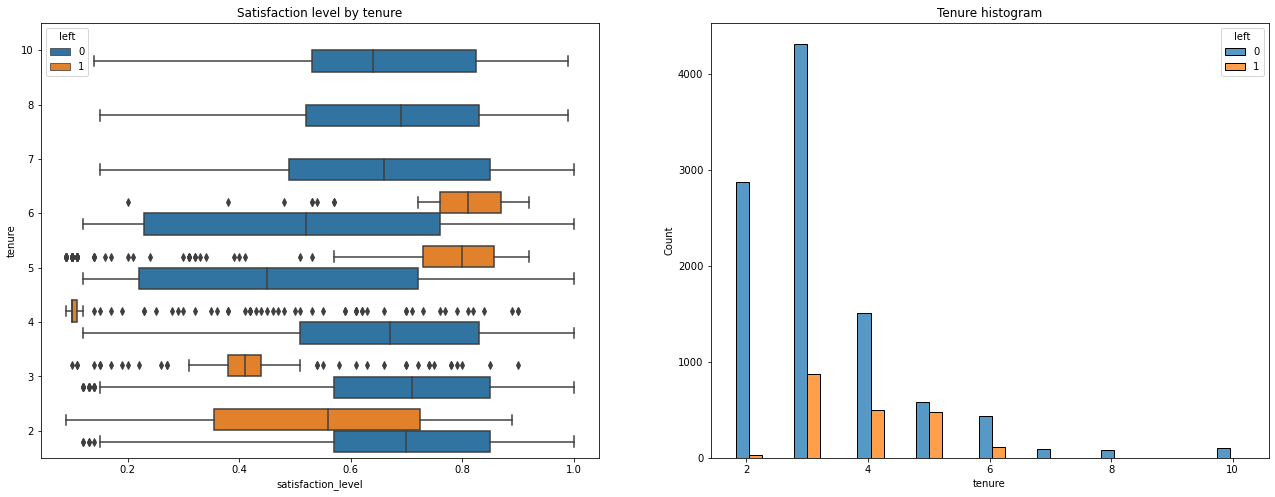

In [16]:
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create a stacked boxplot to show satisfaction levels by tenure
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by tenure')

# Create histogram showing distribution of `tenure`
sns.histplot(data = df1, x = 'tenure', hue ='left', multiple = 'dodge', shrink = 5, ax = ax[1])
ax[1].set_title('Tenure histogram');

Insights from the previous plots:

1. The employees who left can be grouped into two main categories: those with shorter tenures who were dissatisfied, and those with medium-length tenures who were very satisfied.

2. Employees with four years of service who left the company appear to have had unusually low satisfaction levels. It would be valuable to investigate any changes in company policy that might have specifically impacted employees at the four-year mark.

3. The longest-tenured employees did not leave the company. Their satisfaction levels were similar to those of newer employees who chose to stay.

4. The histogram indicates that there are relatively few longer-tenured employees, which suggests they might be the higher-ranking, higher-paid individuals within the company.

In [17]:
# calculate mean and median satisfaction level of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


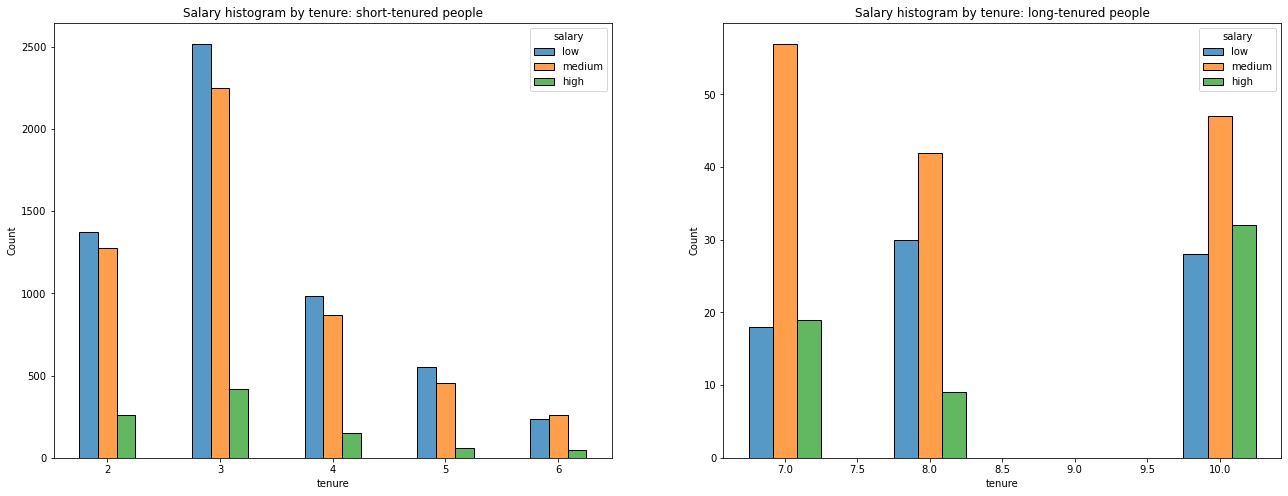

In [18]:
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# separate short-tenured  and long-tenured employees
tenure_short = df1[df1['tenure'] <= 6]
tenure_long = df1[df1['tenure'] > 6]
# create a histogram to examine salary levels for different tenures
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', hue_order = ['low', 'medium', 'high'], discrete = 1, multiple = 'dodge', shrink = .5, ax = ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people')

sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', hue_order = ['low', 'medium', 'high'], discrete = 1, multiple = 'dodge', shrink = .5, ax = ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people');

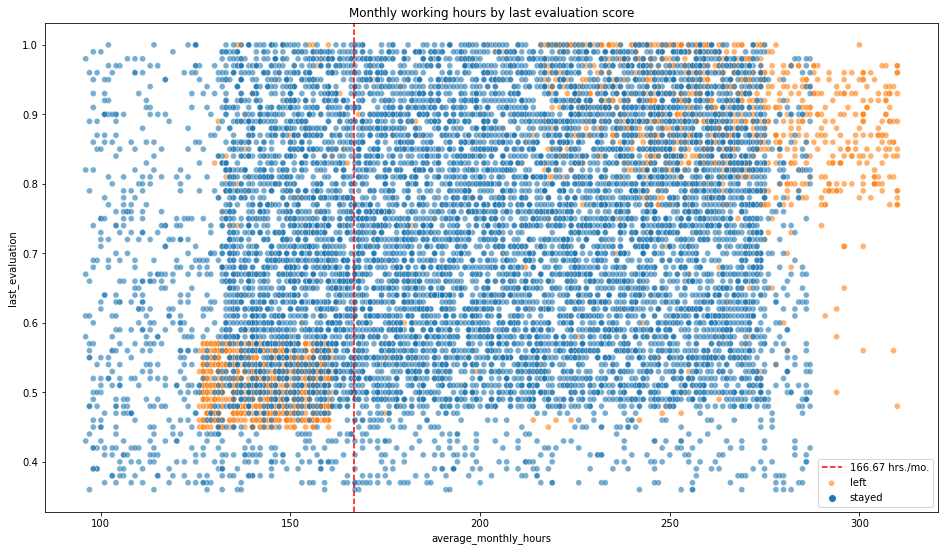

In [19]:
# Create a scatterplot for average monthly hours versus las evaluation
plt.figure(figsize = (16,9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.6)
plt.axvline(x = 166.67, color = 'r', ls = '--')
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly working hours by last evaluation score');

Insights:

1. The scatterplot reveals two distinct groups of employees who left: those who were overworked but performed exceptionally well, and those who worked slightly below the nominal monthly average of 166.67 hours and received lower evaluation scores.

2. Most of the employees in this company work well over 167 hours per month.

3. There isn't a large percentage of employees in the upper left quadrant of this plot; however, working long hours doesn't necessarily result in a high evaluation score.

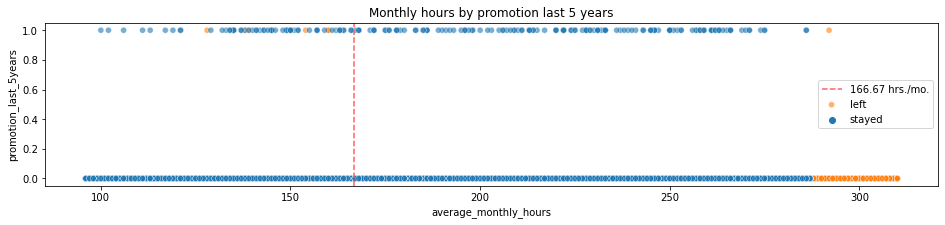

In [20]:
# Create a plot to examine relationship between average monthly hours and promotion in the last five years

plt.figure(figsize=(16, 3))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.6)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years');

1. All of the employees who left were working the longest hours.

2. Very few employees who worked the most hours were promoted.

3. Very few employees who were promoted in the last five years left.


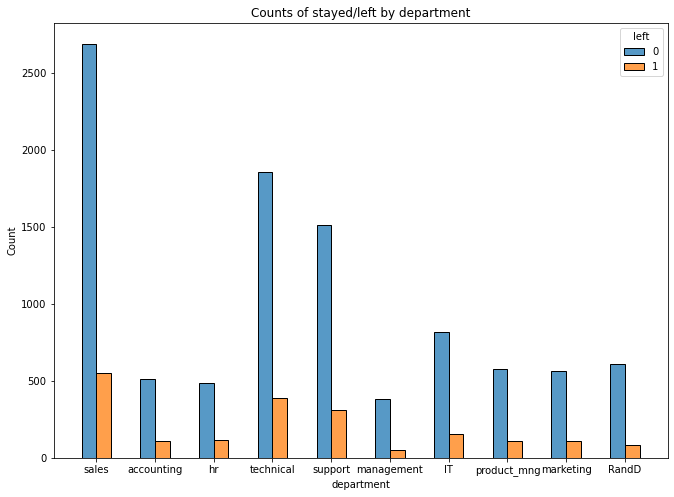

In [21]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who stayed

plt.figure(figsize = (11, 8))
sns.histplot(data = df1, x = 'department', hue = 'left', discrete = 1, hue_order=[0, 1], multiple = 'dodge', shrink = 0.5)
plt.title('Counts of stayed/left by department');

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

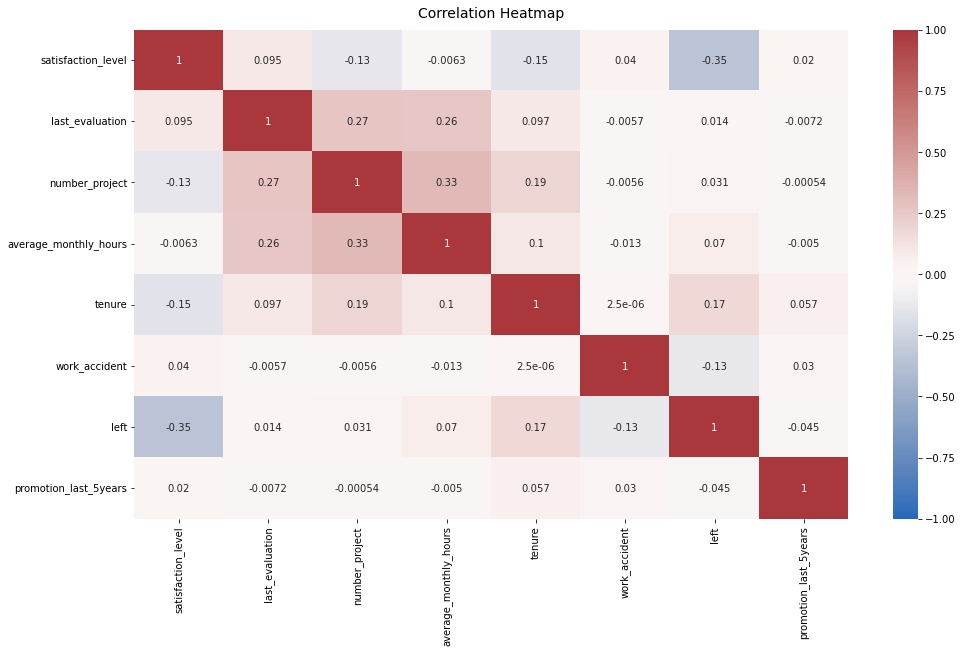

In [22]:
# Create a correlation heatmap 
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all show some positive correlation with each other, while an employee's likelihood of staying is negatively correlated with their satisfaction level.

### Insights

It seems that employees are leaving the company due to poor management. The decision to leave is linked to longer working hours, handling multiple projects, and generally lower satisfaction levels. Working long hours without receiving promotions or good evaluation scores can be demotivating. A significant number of employees at the company are likely experiencing burnout. Additionally, it appears that employees who have been with the company for more than six years tend to stay.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
# Copy the dataframe
df_copy = df1.copy()

# Encode the 'salary' column as an ordinal numeric category
df_copy['salary'] = (
    df_copy['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
)

# Dummy encode the 'department' column
df_copy = pd.get_dummies(df_copy, drop_first = False)

# Define the outcome variable (y) and the features (X)
y = df_copy['left']
X = df_copy.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [25]:
# Instantiate model
tree = DecisionTreeClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
           'min_samples_leaf': [2, 5, 1],
           'min_samples_split': [2, 4, 6]}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [26]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.95 s, sys: 8.7 ms, total: 2.96 s
Wall time: 2.95 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [27]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [28]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

The next function extracts all the scores from the grid search

In [29]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments: 
        model_name (string): the model's name that appears in the table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
    Returns a pandas dataframe with the results of precision, recall, f1 and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    
    # Create a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                  'precision': 'mean_test_precision',
                  'recall': 'mean_test_recall',
                  'f1': 'mean_test_f1',
                  'accuracy': 'mean_test_accuracy'
                  }
    
    # Get all the results from the CV and put them  in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract precision, recall, accuracy, f1 and auc scores from that row
    auc = best_estimator_results.mean_test_roc_auc
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    
    return table

In [30]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All of these scores from the decision tree model indicate good model performance.

Decision trees can be prone to overfitting, but random forests mitigate this by using multiple trees to make predictions. As a next step, I will construct a random forest model.

### Random forest - Round 1 

In [31]:
#Instantiate model
rf = RandomForestClassifier(random_state = 0)

#Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
            'max_features': [1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            'n_estimators': [300, 500],
            }

#Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [32]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 33s, sys: 1 s, total: 9min 34s
Wall time: 9min 34s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [39]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [42]:
def write_pickle(path, model_object, save_as:str):
    '''
    Inputs: 
        path: path of the folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as: filename for how you want to save the model
    
    Output: A call to pickle the model in the folder indicated
    '''
    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [35]:
def read_pickle(path, saved_model_name:str):
    '''
    Inputs:
        path: path to folder where you want to read form
        saved_model_name: filename of pickled model you want to read in
    
    Output:
        model: the pickled model
    '''
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    
    return model

In [43]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [44]:
# Read pickle
read_pickle(path, 'hr_rf1')

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [45]:
# Check the best AUC score on CV
rf1.best_score_

0.9804250949807172

In [46]:
# Check the best parameters 
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [47]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The random forest model's evaluation scores are generally better than those of the decision tree model, with the exception of recall, where the random forest's score is approximately 0.001 lower—a negligible difference. This suggests that the random forest model outperforms the decision tree model.

Next, I will evaluate the random forest model on the test set.

In [48]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.
    Inputs: 
        model_name (str): how you want your model to be named in the table
        model: a fit GridSearchCV object
        X_test_data: numpay array of X_test data
        y_test_data: numpay array of y_test data
        
    Outputs: pandas dataframe of precision, recall, F1, accuracy and AUC scores for the model
    '''
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                         'precision': [precision],
                         'recall': [recall],
                         'f1': [f1],
                         'accuracy': [accuracy],
                         'AUC': [auc]
                         })
    return table

In [49]:
rf1_test_scores = get_scores('random forest 1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest 1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are very similar to the validation scores, which is good. Since this test set was used exclusively for this model, you can be more confident that its performance on this data is indicative of how it will perform on new, unseen data.

### Feature Engineering

It's likely that the company won't have satisfaction levels reported for all employees. Additionally, the `average_monthly_hours` column could be a source of data leakage. If employees have already decided to quit or have been identified by management as potential candidates for termination, they might be working fewer hours, which could inadvertently influence the model's predictions.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

In [50]:
# Drop 'satisfaction_level' and save resulting dataframe in new variable
df2 = df_copy.drop('satisfaction_level', axis=1)
df2.head(10)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
# Create a new 'overworked' column
df2['overworked'] = df2['average_monthly_hours']

# I am defining being overworked as working more than 175 hours per month on average
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [52]:
# Drop the 'average_monthly_hours' column
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
# Isolate the outcome variable
y = df2['left']

#Select the features
X = df2.drop('left',axis=1)

In [54]:
# Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree - Round 2

In [57]:
# Instantiate model
tree = DecisionTreeClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
           'min_samples_leaf': [2, 5, 1],
           'min_samples_split': [2, 4, 6],
           }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [58]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.33 s, sys: 7 µs, total: 2.33 s
Wall time: 2.32 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [59]:
# Check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [60]:
# best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and the amount of hours worked.

In [61]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores dropped. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

### Random Forest - Round 2

In [62]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [63]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 7min 17s, sys: 1.11 s, total: 7min 19s
Wall time: 7min 19s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [64]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [65]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [66]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [67]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [68]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric. 

Score the champion model on the test set now.

In [69]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


This seems to be a stable, well-performing final model. 

Plot a confusion matrix to visualize how well it predicts on the test set.

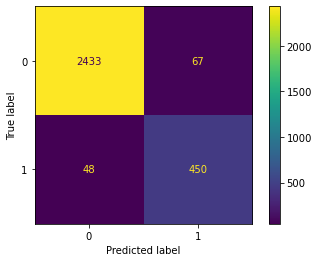

In [71]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = rf2.classes_)

disp.plot(values_format = '');

The model generates more false positives than false negatives, indicating that some employees might be wrongly identified as at risk of quitting or getting fired when they aren't. Despite this, the model remains strong.

For further exploration, I will examine the splits in the decision tree model and identify the most important features in the random forest model. This could provide valuable insights into the factors driving the predictions.

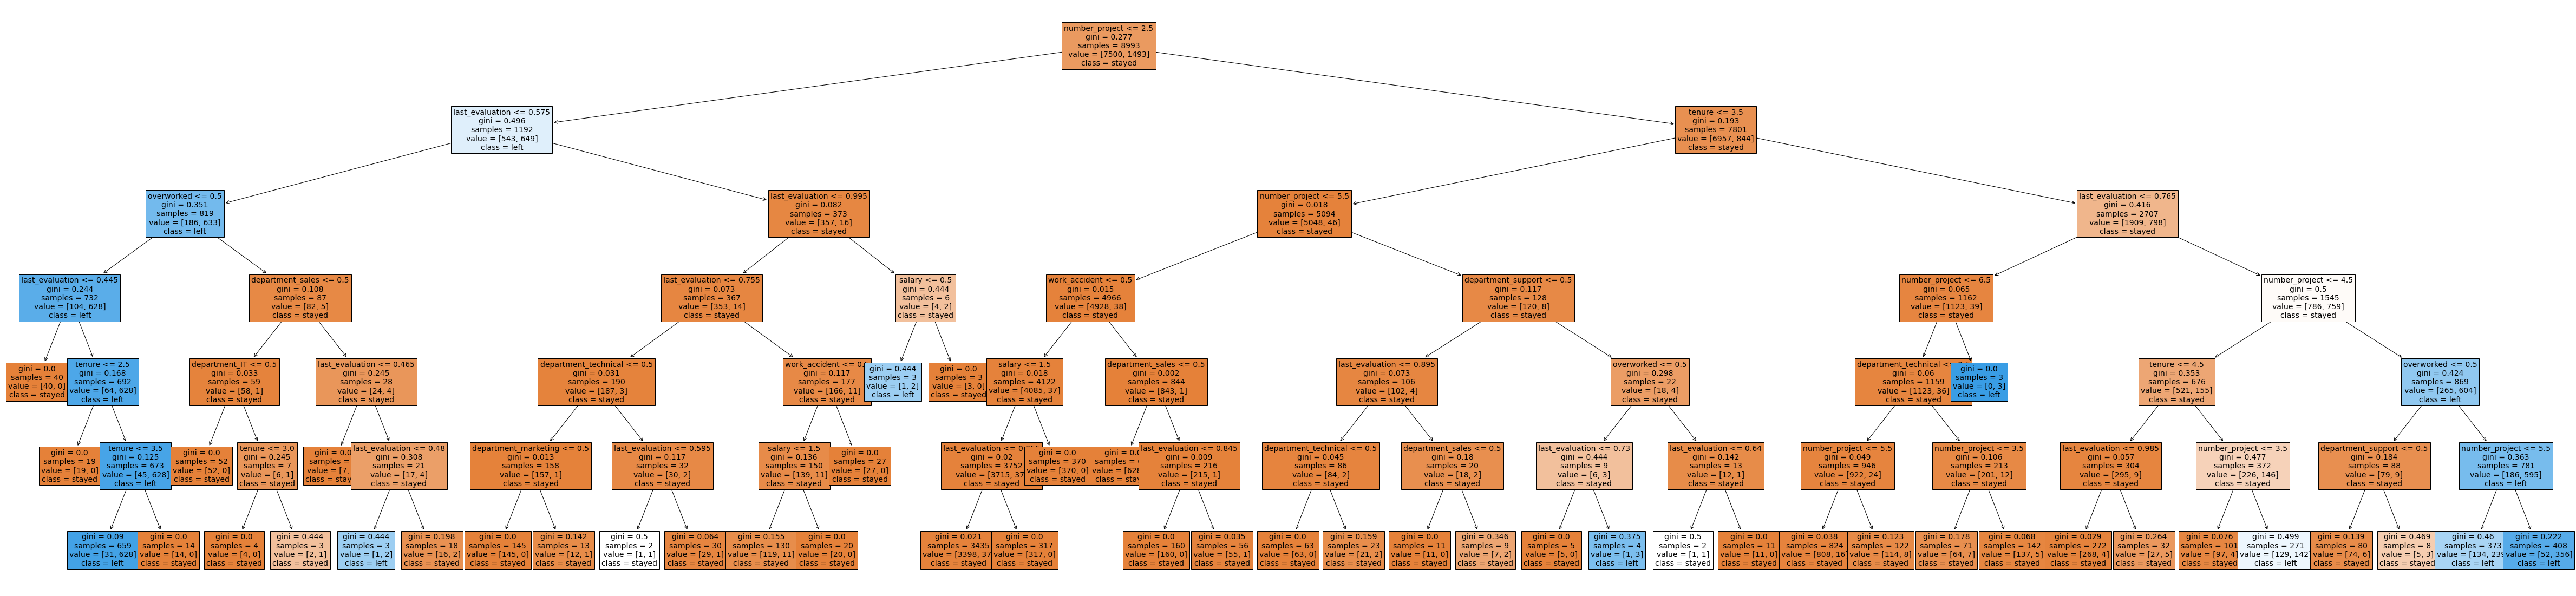

In [72]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
         class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision Tree feature importance

In [73]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                columns = ['gini_importance'],
                                index = X.columns
                                )

tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending = False)
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


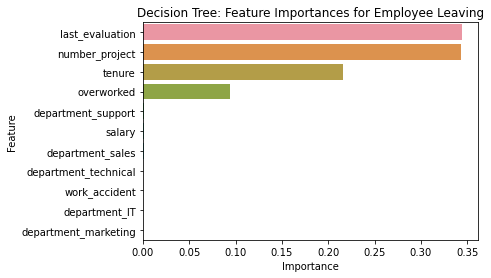

In [74]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index)
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

#### Random Forest feature importance

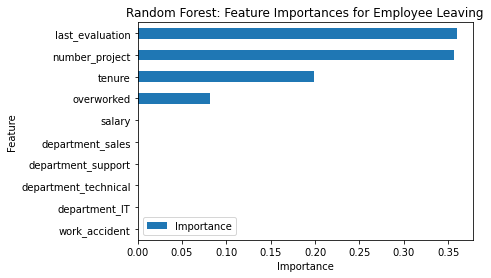

In [75]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above indicates that in this random forest model, the variables `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are the most influential in predicting whether an employee will leave (`left`), and they align with those used by the decision tree model. This consistency further supports their significance in understanding employee turnover.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


After feature engineering, the decision tree model achieved strong performance metrics on the test set, with an AUC of 93.8%, precision of 87.0%, recall of 90.4%, an F1-score of 88.7%, and accuracy of 96.2%. The random forest model modestly outperformed the decision tree, indicating its slightly superior ability to generalize and predict outcomes more accurately.

### Conclusion, Recommendations, Next Steps

The models and the feature importances derived from them reinforce the conclusion that employees at the company are overworked. This finding is consistently highlighted as a significant factor influencing employee turnover.

To retain employees, the following recommendations could be presented to the stakeholders:

1. Implementing a cap on the number of projects that employees can work on could help reduce overwork and prevent burnout. This strategy may lead to better work-life balance, increased job satisfaction, and potentially lower turnover rates within the company.

2. Consider promoting employees who have been with the company for at least four years, or conduct a deeper investigation into why employees with four years of tenure are so dissatisfied.

3. Either reward employees for working longer hours, or don't require them to do so.

4. If employees aren't familiar with the company's overtime pay policies, take steps to inform them. Expectations around workload and time off should be clearly communicated. Being transparent can help manage employee expectations, reduce stress, and improve overall job satisfaction.

5. Hold company-wide and within-team discussions to gain insights into and address the work culture across the organization and within specific teams.

6. High evaluation scores should not be reserved solely for employees who work 200+ hours per month. Instead, consider implementing a proportionate scale that rewards employees based on their contribution and effort, regardless of the number of hours worked. 

**Next Steps**

It may be prudent to remain cautious about potential data leakage. To assess this, consider evaluating how predictions change when `last_evaluation` is removed from the dataset. If evaluations aren't conducted frequently, predicting employee retention without this feature might be beneficial. Additionally, if the evaluation score strongly influences an employee's decision to leave or stay, it may be valuable to pivot and focus on predicting performance scores instead. The same approach could be applied to the satisfaction score, ensuring that the model's predictions are robust and not unduly influenced by features that might indicate leakage.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.